In [125]:
import pandas as pd
import numpy as np

In [127]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv('test.csv')

In [128]:
train_data.shape, test_data.shape

((7352, 563), (2947, 563))

In [132]:
train_data.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [72]:
train_data[['Activity']].value_counts()

Activity          
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
dtype: int64

In [73]:
train_data.isnull().values.sum()

0

In [74]:
import seaborn as sb
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


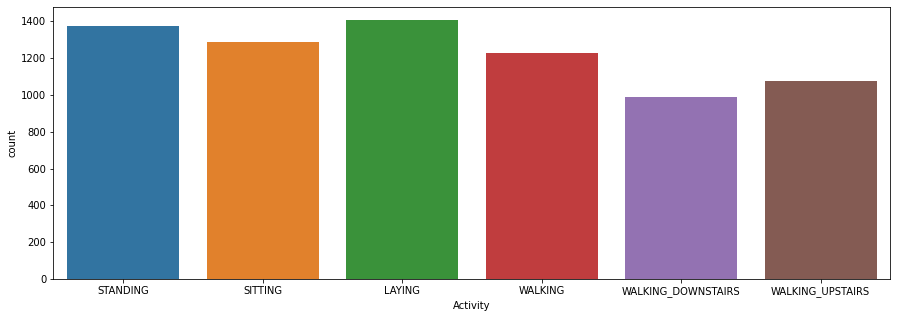

In [75]:
plt.figure(figsize=(15,5))
sb.countplot("Activity",data= train_data)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='subject', ylabel='count'>

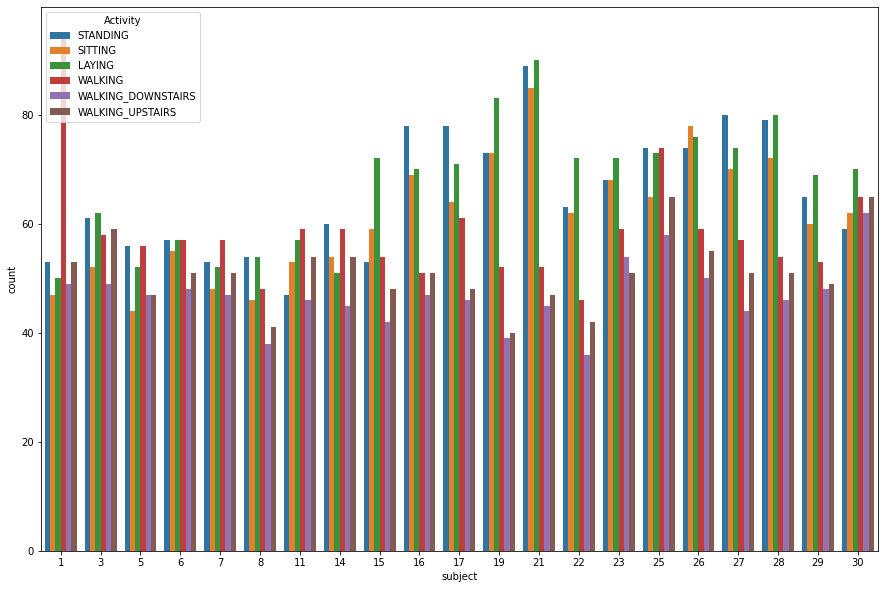

In [76]:
plt.figure(figsize=(15,10))
sb.countplot("subject", hue="Activity", data=train_data)

In [77]:
# there are [] , - between columns name

columns=train_data.columns

In [78]:
columns=columns.str.replace('[()]',"")
columns=columns.str.replace('[-]',"")
columns=columns.str.replace('[,]',"")

In [155]:
train_data.columns=columns
train_data.iloc[:2,:50]

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,tGravityAccmeanX,tGravityAccmeanY,tGravityAccmeanZ,tGravityAccstdX,tGravityAccstdY,tGravityAccstdZ,tGravityAccmadX,tGravityAccmadY,tGravityAccmadZ,tGravityAccmaxX
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,0.963396,-0.140840,0.115375,-0.985250,-0.981708,-0.877625,-0.985001,-0.984416,-0.894677,0.892055
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.966561,-0.141551,0.109379,-0.997411,-0.989447,-0.931639,-0.997884,-0.989614,-0.933240,0.892060


## Exploarty Data analysis

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureW

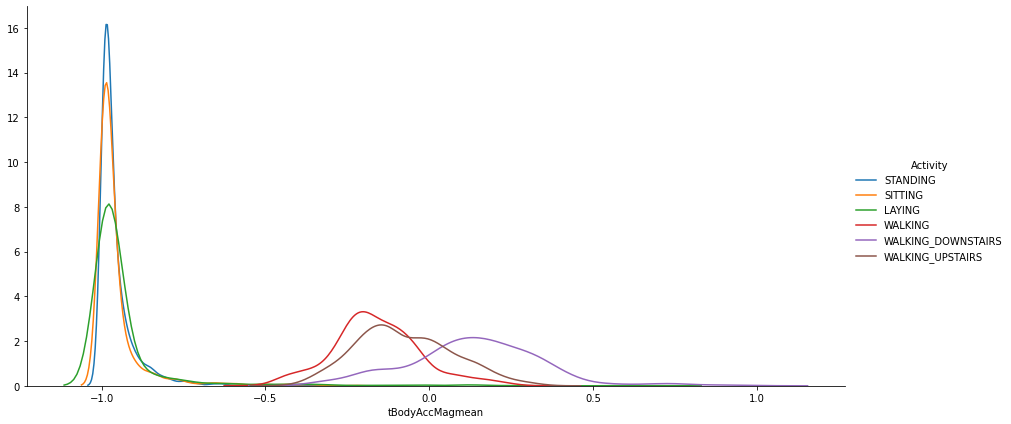

In [80]:
facetgrid = sb.FacetGrid(train_data, hue='Activity', size=6,aspect=2)
facetgrid.map(sb.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

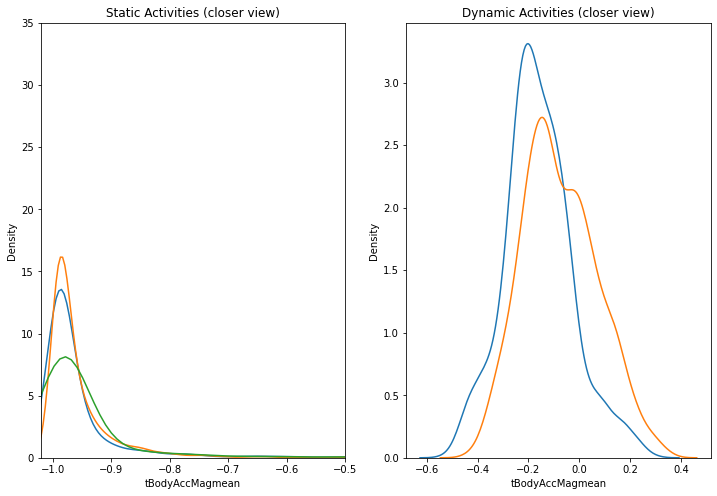

In [81]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.title("Static Activities (closer view)")
sb.distplot(train_data[train_data["Activity"]=="SITTING"]['tBodyAccMagmean'], hist = False, label = 'Sitting');
sb.distplot(train_data[train_data["Activity"]=="STANDING"]['tBodyAccMagmean'], hist = False, label = 'Standing');
sb.distplot(train_data[train_data["Activity"]=="LAYING"]['tBodyAccMagmean'], hist = False, label = 'Laying');

########

plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities (closer view)")
sb.distplot(train_data[train_data["Activity"]=="WALKING"]["tBodyAccMagmean"], hist = False, label ="Sitting");
sb.distplot(train_data[train_data["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMagmean'], hist = False, label = 'Laying');

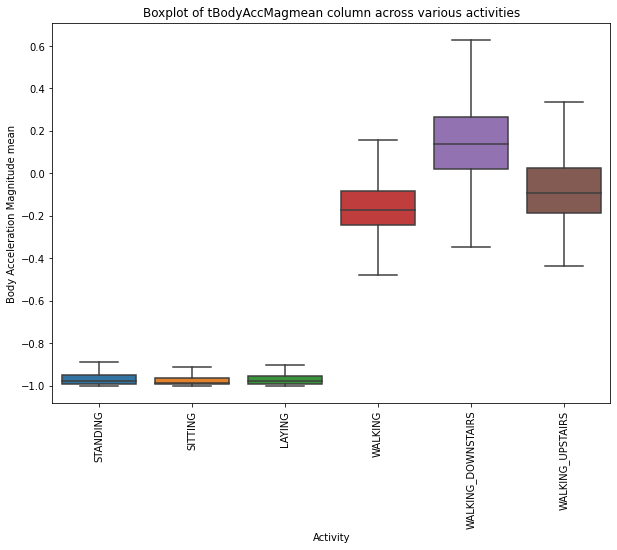

In [82]:
plt.figure(figsize = (10,7))
sb.boxplot(x = 'Activity', y ='tBodyAccMagmean', data = train_data, showfliers = False);
plt.ylabel('Body Acceleration Magnitude mean')
plt.title('Boxplot of tBodyAccMagmean column across various activities')
plt.xticks(rotation = 90)
plt.show()

## Visualizing data using t-SNE


In [83]:
from sklearn.manifold import TSNE

In [84]:
tsne_data=train_data.drop(['subject','Activity'], axis=1)

In [85]:
tsne=TSNE(random_state = 42, n_components = 2, verbose = 1, perplexity = 50, n_iter = 1000).fit_transform(tsne_data)
tsne

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.003s...
[t-SNE] Computed neighbors for 7352 samples in 1.467s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.125374
[t-SNE] KL divergence after 1000 iterations: 1.282858


array([[-69.04361 , -10.86566 ],
       [-35.054623,  19.396532],
       [-53.818283,   4.153486],
       ...,
       [-21.516485, -46.3872  ],
       [-21.445475, -46.13499 ],
       [-21.700153, -45.38226 ]], dtype=float32)

<AxesSubplot:>

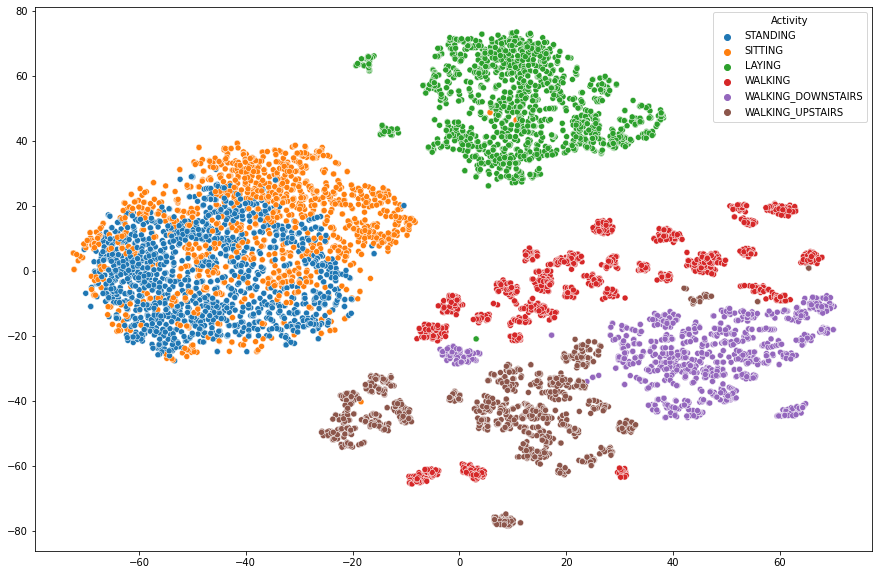

In [86]:
plt.figure(figsize=(15,10))
sb.scatterplot(x=tsne[:,0], y=tsne[:,1], hue=train_data['Activity'])

### Data Preprocessing

In [87]:
# split data to train and test
train_x=train_data.drop(['Activity','subject'], axis=1)
train_y=train_data['Activity']
test_x=train_data.drop(['Activity','subject'], axis=1)
test_y=train_data.Activity

In [88]:
train_x.shape, test_x.shape, train_y.shape,test_y.shape

((7352, 561), (7352, 561), (7352,), (7352,))

In [89]:
# create empty DataFrame for mdels
model_score=pd.DataFrame(columns=('Model','Score'))

## Machin Learning

### Logistic Regression Model

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [91]:
lin_reg=LogisticRegression()
lin_reg.fit(train_x,train_y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [92]:
lin_reg_pred=lin_reg.predict(test_x)
lin_reg_scored=accuracy_score(lin_reg_pred, test_y)
lin_reg_scored

0.9908868335146899

In [93]:
# using RandomizedsearchCV for cross validation
Random_Search=RandomizedSearchCV(lin_reg, param_distributions={'C':np.arange(10,61,10),'penalty':['l2','l1']},cv=5, random_state = 42)
Random_Search.fit(train_x,train_y)
Random_Search_pred=Random_Search.predict(test_x)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [94]:
RandomizedSearch_scored=accuracy_score(test_y,Random_Search_pred)

In [95]:
model_score=model_score.append(pd.DataFrame({'Model':['LogisticRegression'], 'score':[RandomizedSearch_scored]}))

In [96]:
def plot_confusion_matrix(cm, lables):
    fig, ax = plt.subplots(figsize = (12,8))
    im = ax.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    ax.figure.colorbar(im, ax = ax)
    ax.set(xticks = np.arange(cm.shape[1]))
    yticks = np.arange(cm.shape[0])
    ylabel = 'True label'
    xlabel = 'Predicted label'
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i,j]), ha = "center", va = "center", color = "white" if cm[i,j]> thresh else "black")
            fig.tight_layout()

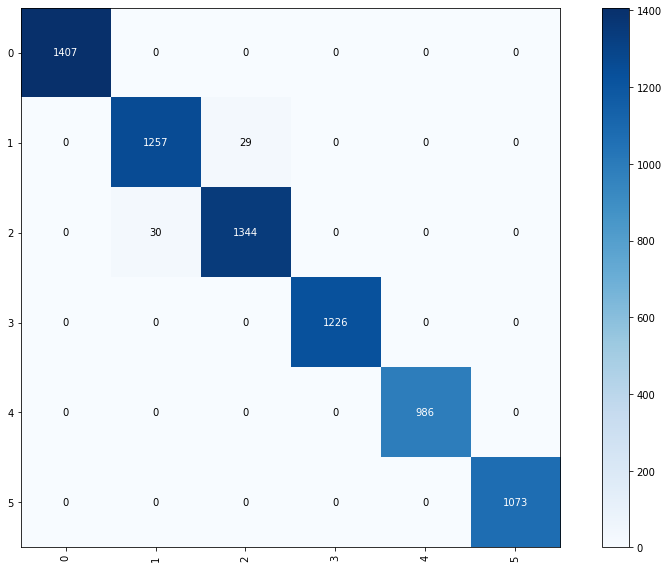

In [97]:
cm = confusion_matrix(test_y.values, Random_Search_pred)
plot_confusion_matrix(cm, np.unique(Random_Search_pred))

In [98]:
# function to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator:", model.best_estimator_)
    print("Best set of parameters:", model.best_params_)
    print("Best score:", model.best_score_)

In [99]:
get_best_randomsearch_results(Random_Search)

Best estimator: LogisticRegression(C=60)
Best set of parameters: {'penalty': 'l2', 'C': 60}
Best score: 0.9339024311288078


## Linear SVM Model

In [100]:
from sklearn.svm import LinearSVC

In [101]:
parameters = {'C': np.arange(1,12,2)}
lr_svm = LinearSVC(tol = 0.00005)
lr_svm_rs = RandomizedSearchCV(lr_svm, param_distributions = parameters, random_state = 42)
lr_svm_rs.fit(train_x, train_y)
y_pred = lr_svm_rs.predict(test_x)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to co

In [102]:
lr_svm_accuracy = accuracy_score(test_y,y_pred)
print("Accuracy using Linear SVM:", lr_svm_accuracy)

Accuracy using Linear SVM: 0.9951033732317737


In [103]:
model_score = model_score.append(pd.DataFrame({'Model':["LinearSVM"],'Score':[lr_svm_accuracy]}))
model_score

,Model,Score,score
0,LogisticRegression,NaN,0.991975
0,LinearSVM,0.995103,NaN


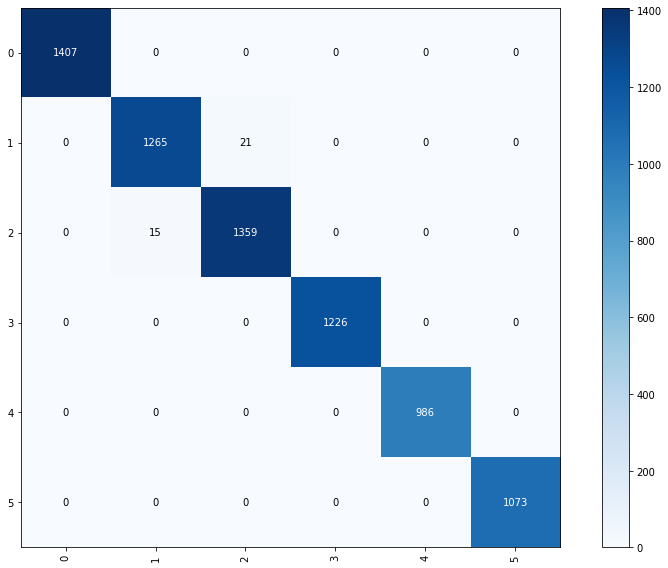

In [104]:
cm = confusion_matrix(test_y.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [105]:
get_best_randomsearch_results(lr_svm_rs)

Best estimator: LinearSVC(C=1, tol=5e-05)
Best set of parameters: {'C': 1}
Best score: 0.9413837594861194


### Kernal SVM Model

In [106]:
from sklearn.svm import SVC

In [107]:
parameters = {'C':[2,4,8,16], 'gamma':[0.125, 0.250, 0.5, 1]}
kernel_svm = SVC(kernel = 'rbf')
kernel_svm_rs = RandomizedSearchCV(kernel_svm, param_distributions = parameters, random_state = 42)
kernel_svm_rs.fit(train_x, train_y)
pred_y = kernel_svm_rs.predict(test_x)

In [108]:
kernel_svm_accuracy = accuracy_score(test_y, pred_y)
print("Accuracy using Kernel SVM:", kernel_svm_accuracy)

Accuracy using Kernel SVM: 1.0


In [109]:
model_score = model_score.append(pd.DataFrame({'Model':["KernelSVM"],'Score':[kernel_svm_accuracy]}))

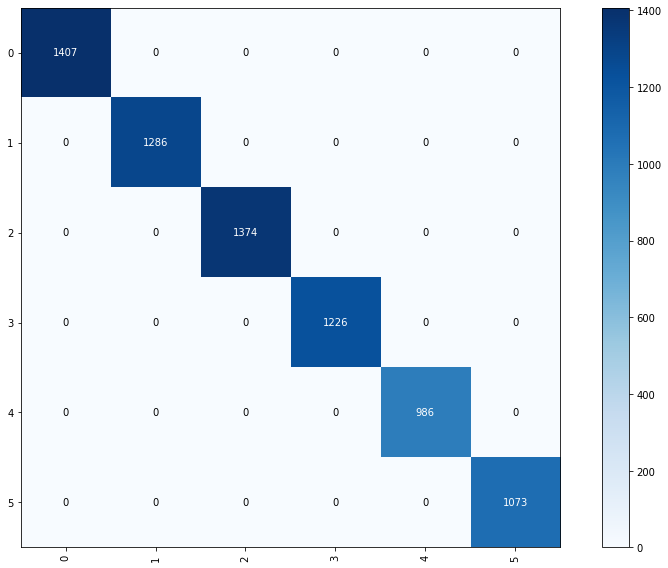

In [110]:
cm = confusion_matrix(test_y.values, pred_y)
plot_confusion_matrix(cm, np.unique(y_pred))

In [111]:
get_best_randomsearch_results(kernel_svm_rs)

Best estimator: SVC(C=8, gamma=0.125)
Best set of parameters: {'gamma': 0.125, 'C': 8}
Best score: 0.896632121237346


### Decision Tree Model

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
parameters = {'max_depth':np.arange(2,10,2)}
dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier,param_distributions=parameters,random_state = 42)
dt_classifier_rs.fit(train_x, train_y)
pred_y = dt_classifier_rs.predict(test_x)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [114]:
dt_accuracy = accuracy_score(test_y, pred_y)
print("Accuracy using Decision tree:", dt_accuracy)

Accuracy using Decision tree: 0.9733405875952121


In [115]:
model_score = model_score.append(pd.DataFrame({'Model':["DecisionTrees"],'Score':[dt_accuracy]}))

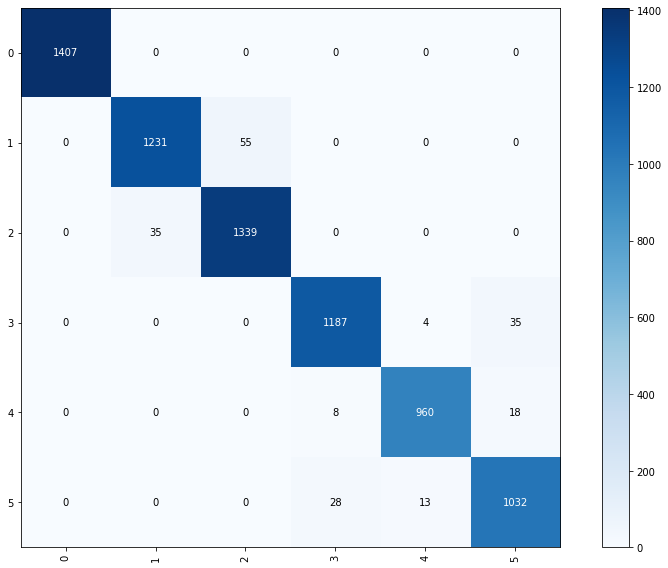

In [116]:
cm = confusion_matrix(test_y.values, pred_y)
plot_confusion_matrix(cm, np.unique(pred_y))

In [117]:
get_best_randomsearch_results(dt_classifier_rs)

Best estimator: DecisionTreeClassifier(max_depth=8)
Best set of parameters: {'max_depth': 8}
Best score: 0.8450836813311321


### Random Forest Model

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
params = {'n_estimators': np.arange(20,101,10), 'max_depth':np.arange(2,16,2)}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=params,random_state = 42)
rf_classifier_rs.fit(train_x, train_y)
pred_y = rf_classifier_rs.predict(test_x)

In [120]:
rf_accuracy = accuracy_score(test_y, pred_y)
print("Accuracy using Random Forest:", rf_accuracy)

Accuracy using Random Forest: 0.9957834602829162


In [121]:
model_score = model_score.append(pd.DataFrame({'Model':["RandomForest"],'Score':[rf_accuracy]}))

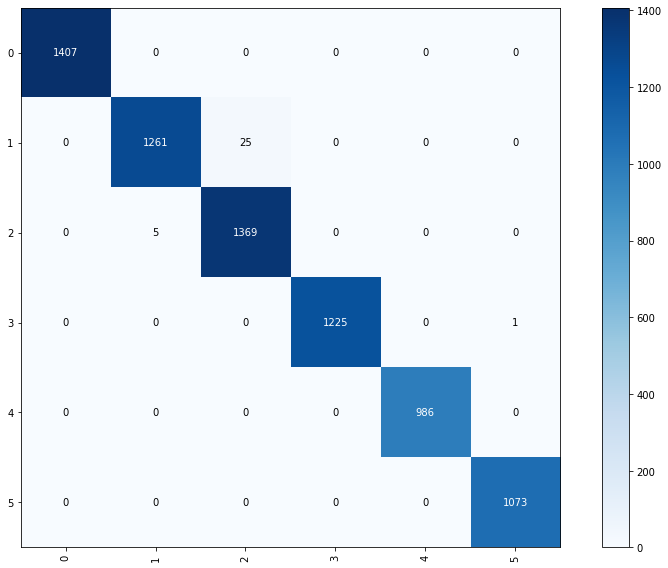

In [122]:
cm = confusion_matrix(test_y.values, pred_y)
plot_confusion_matrix(cm, np.unique(pred_y))

In [123]:
get_best_randomsearch_results(rf_classifier_rs)

Best estimator: RandomForestClassifier(max_depth=10, n_estimators=90)
Best set of parameters: {'n_estimators': 90, 'max_depth': 10}
Best score: 0.9217954374135786


In [124]:
model_score

,Model,Score,score
0,LogisticRegression,NaN,0.991975
0,LinearSVM,0.995103,NaN
0,KernelSVM,1.000000,NaN
0,DecisionTrees,0.973341,NaN
0,RandomForest,0.995783,NaN
